# Classification model with PCA 

**The main objective of this notebook is to learn the functioning of PCA algorithm.**

This model predicts the car type of a vehicle based on the price and mileage as features. Initially, the features are scaled and selected using PCA. Upon processing, logistic regression is performed to get the prediction.


In [99]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [100]:
df = pd.read_csv('/kaggle/input/usa-cers-dataset/USA_cars_datasets.csv')
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


## data wrangling

In [101]:
df.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [102]:
df1 = df.drop(columns=['Unnamed: 0'])
df1 = df1.loc[df1['price'] != 0]
df1 = df1.loc[df1['mileage'] != 0]
df1['mileage'] = df1['mileage'].astype('int')
df1

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,9200,nissan,versa,2018,clean vehicle,34553,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,9200,nissan,versa,2018,clean vehicle,31594,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,9200,nissan,versa,2018,clean vehicle,32557,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [103]:
df1.describe()

,price,year,mileage,lot
count,2453.000000,2453.000000,2.453000e+03,2.453000e+03
mean,19117.595190,2016.934774,5.017271e+04,1.676949e+08
std,11953.737376,2.956562,5.460970e+04,2.030748e+05
min,25.000000,1973.000000,1.000000e+00,1.593488e+08
25%,10600.000000,2016.000000,2.130400e+04,1.676273e+08
50%,17100.000000,2018.000000,3.506500e+04,1.677452e+08
75%,25800.000000,2019.000000,6.015800e+04,1.677801e+08
max,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [104]:
df4 = df1[['price','mileage','title_status']]
df_pca = df1[['price','mileage']]
df_pca

,price,mileage
0,6300,274117
1,2899,190552
2,5350,39590
3,25000,64146
4,27700,6654
...,...,...
2494,7800,23609
2495,9200,34553
2496,9200,31594
2497,9200,32557


## Feature scaling

In [105]:
from sklearn.preprocessing import StandardScaler
df_s = StandardScaler().fit_transform(df_pca)

## PCA with 2 components

In [106]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca= pca.fit(df_s)
pca_model= pca.transform(df_s)
df2 = pd.DataFrame(data = pca_model,columns=['PC1','PC2'])
df2

,PC1,PC2
0,3.658667,2.141944
1,2.777638,0.858470
2,0.677512,-0.951626
3,-0.167068,0.529005
4,-1.071395,-0.055828
...,...,...
2448,0.325586,-1.013640
2449,0.384490,-0.789072
2450,0.346168,-0.827394
2451,0.358640,-0.814923


In [107]:
df3 = pd.concat([df2,df4['title_status']],axis=1)
df3 = df3.dropna()
df3 = df3.reset_index()
df3 = df3.drop(columns='index',axis=1)
df3

,PC1,PC2,title_status
0,3.658667,2.141944,clean vehicle
1,2.777638,0.858470,clean vehicle
2,0.677512,-0.951626,clean vehicle
3,-0.167068,0.529005,clean vehicle
4,-1.071395,-0.055828,clean vehicle
...,...,...,...
2402,0.325586,-1.013640,clean vehicle
2403,0.384490,-0.789072,clean vehicle
2404,0.346168,-0.827394,clean vehicle
2405,0.358640,-0.814923,clean vehicle


## Data Visualisation

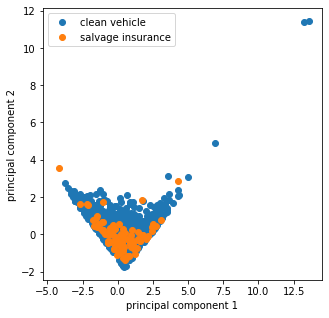

In [108]:
import matplotlib
from matplotlib import pyplot as plt
plt.figure(figsize = (5,5))
yr = ['clean vehicle','salvage insurance']
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
for i in yr:

                                        d = df3['title_status'] ==  i
                                        plt.scatter(df3.loc[d,'PC1'],df3.loc[d,'PC2'])
plt.legend(yr)


Based on the visualisation,most of the variance values for each of the car type is more or less within the same range. This could prove that price and mileage are the major features required for car type prediction.

In [109]:
pca.explained_variance_ratio_

array([0.69503941, 0.30496059])

Based on the pca components, 69.5% is allotted to price and 30% is allotted to mileage. The total variance being 99%.

## Classification model - development

In [110]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le = le.fit_transform(df3['title_status'])
df5 = pd.DataFrame(data = le,columns= ['type'])
df6 = pd.concat([df3[['PC1','PC2']],df5],axis=1)
df6

,PC1,PC2,type
0,3.658667,2.141944,0
1,2.777638,0.858470,0
2,0.677512,-0.951626,0
3,-0.167068,0.529005,0
4,-1.071395,-0.055828,0
...,...,...,...
2402,0.325586,-1.013640,0
2403,0.384490,-0.789072,0
2404,0.346168,-0.827394,0
2405,0.358640,-0.814923,0


In [111]:
X = df6[['PC1','PC2']]
y = df6['type']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [112]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train,y_train)
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Model Evaluation

In [113]:
yhat = lr.predict(X_test)

In [114]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_test,yhat))
print("Accuracy score",accuracy_score(y_test,yhat))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       456
           1       0.00      0.00      0.00        26

    accuracy                           0.95       482
   macro avg       0.47      0.50      0.49       482
weighted avg       0.90      0.95      0.92       482

Accuracy score 0.946058091286307


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


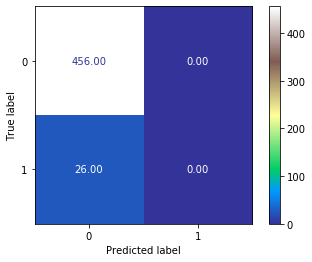

In [115]:
from sklearn.metrics import plot_confusion_matrix
display = plot_confusion_matrix(lr,X_test,y_test,cmap='terrain',values_format='0.2f')

Based on the confused matrix, it is inferred that the prediction of the type 'clean vehicle' has more test samples while for the other type 'salavge insurance', there are no test samples predicted. This could be the case of skewed class or data insufficiency for other car type.